<a href="https://colab.research.google.com/github/JakeOh/202205_itw_bd34/blob/main/da09_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataFrame 합치기

In [1]:
# 필요한 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# merge

두 개의 DataFrame을 공통된 컬럼(들)을 기준으로 합치는 것. SQL의 join과 같은 기능.

In [2]:
emp = pd.DataFrame(data={
    'empno': [100, 101, 200, 201],
    'ename': ['Scott', 'King', 'Allen', 'Tiger'],
    'deptno': [10, 20, 10, 50]
})

In [3]:
emp

,empno,ename,deptno
0,100,Scott,10
1,101,King,20
2,200,Allen,10
3,201,Tiger,50


In [4]:
dept = pd.DataFrame(data={
    'deptno': [10, 20, 30],
    'dname': ['HR', 'IT', 'Sales']
})

In [5]:
dept

,deptno,dname
0,10,HR
1,20,IT
2,30,Sales


merge(join)

*   `pd.merge(df1, df2, how, on, ...)` 함수
*   `pd.DataFrame.merge(df, how, on, ...)` 메서드
*   `how` 파라미터: merge(join) 방식. inner, left, right, outer
    *   merge 방식의 기본값은 inner. `how=inner`는 생략 가능
*   `on` 파라미터: merge(join)의 기준이 되는 컬럼(컬럼들의 리스트).
    *   merge하려는 2개의 데이터 프레임에서 컬럼 이름이 같은 경우에는 on 파라미터를 생략할 수 있음.


## inner join

In [6]:
pd.merge(emp, dept, how='inner', on='deptno')
# how='inner' 생략 가능
# emp와 dept에서 deptno 컬럼 이름이 동일. -> on 생략 가능

,empno,ename,deptno,dname
0,100,Scott,10,HR
1,200,Allen,10,HR
2,101,King,20,IT


In [7]:
emp.merge(dept)

,empno,ename,deptno,dname
0,100,Scott,10,HR
1,200,Allen,10,HR
2,101,King,20,IT


## left (outer) join

In [8]:
pd.merge(emp, dept, how='left')

,empno,ename,deptno,dname
0,100,Scott,10,HR
1,101,King,20,IT
2,200,Allen,10,HR
3,201,Tiger,50,NaN


## right (outer) join

In [9]:
pd.merge(emp, dept, how='right')

,empno,ename,deptno,dname
0,100.0,Scott,10,HR
1,200.0,Allen,10,HR
2,101.0,King,20,IT
3,NaN,NaN,30,Sales


## (full) outer join

In [10]:
pd.merge(emp, dept, how='outer')

,empno,ename,deptno,dname
0,100.0,Scott,10,HR
1,200.0,Allen,10,HR
2,101.0,King,20,IT
3,201.0,Tiger,50,NaN
4,NaN,NaN,30,Sales


## join의 기준이 되는 컬럼 이름이 다른 경우

In [11]:
employees = pd.DataFrame(data={
    'empno': [100, 101, 200, 201],
    'ename': ['Scott', 'King', 'Allen', 'Tiger'],
    'deptno': [10, 20, 10, 50]
})
employees

,empno,ename,deptno
0,100,Scott,10
1,101,King,20
2,200,Allen,10
3,201,Tiger,50


In [12]:
departments = pd.DataFrame(data={
    'dno': [10, 20, 30],
    'dname': ['HR', 'IT', 'Sales']
})
departments

,dno,dname
0,10,HR
1,20,IT
2,30,Sales


In [13]:
pd.merge(employees, departments, left_on='deptno', right_on='dno')

,empno,ename,deptno,dno,dname
0,100,Scott,10,10,HR
1,200,Allen,10,10,HR
2,101,King,20,20,IT


## 인덱스를 사용한 merge

In [15]:
np.random.seed(1)

df1 = pd.DataFrame(data={'val_1': np.random.randint(10, size=4),
                         'val_2': np.random.randint(100, size=4)},
                   index=['a', 'b', 'c', 'd'])
df1

,val_1,val_2
a,5,79
b,8,64
c,9,16
d,5,1


In [18]:
df2 = pd.DataFrame(data={'data_1': np.random.randn(4),
                         'data_2': np.random.randn(4)},
                   index=['d', 'b', 'c', 'a'])
df2

,data_1,data_2
d,-0.528172,1.744812
b,-1.072969,-0.761207
c,0.865408,0.319039
a,-2.301539,-0.249370


In [19]:
pd.merge(df1, df2, left_index=True, right_index=True)

,val_1,val_2,data_1,data_2
a,5,79,-2.301539,-0.249370
b,8,64,-1.072969,-0.761207
c,9,16,0.865408,0.319039
d,5,1,-0.528172,1.744812


## 인덱스와 컬럼을 사용한 merge

In [20]:
df3 = pd.DataFrame(data={'name': ['d', 'b', 'c', 'a'],
                         'data': np.random.randint(100, size=4)})
df3

,name,data
0,d,29
1,b,14
2,c,50
3,a,68


In [28]:
pd.merge(df1, df3, left_index=True, right_on='name').reset_index(drop=True)
# reset_index(): 인덱스를 데이터 프레임의 컬럼으로 만들고, 인덱스를 리셋.
# reset_index(drop=True): 기존 인덱스를 삭제하고 리셋.

,val_1,val_2,name,data
0,5,79,a,68
1,8,64,b,14
2,9,16,c,50
3,5,1,d,29


In [30]:
pd.merge(df1, df3, left_index=True, right_on='name').set_index('name')
# set_index(col_name): col_name을 인덱스로 설정.

,val_1,val_2,data
name,,,
a,5,79,68
b,8,64,14
c,9,16,50
d,5,1,29


# concat

`pd.Series` 또는 `pd.DataFrame`을 축(axis)를 따라서 합치는 방법.

## Series에서의 concat

In [31]:
s1 = pd.Series(data=['a', 'b', 'c'])
s1

0    a
1    b
2    c
dtype: object

In [32]:
s2 = pd.Series(data=['d', 'e'])
s2

0    d
1    e
dtype: object

In [34]:
pd.concat([s1, s2], axis=0)
# axis=0은  생략 가능(default argument).

0    a
1    b
2    c
0    d
1    e
dtype: object

In [35]:
pd.concat([s1, s2], ignore_index=True)

0    a
1    b
2    c
3    d
4    e
dtype: object

In [36]:
pd.concat([s1, s2], axis=1)
#> Series 2개를 axis=1 방향으로 합치면 그 결과는 DataFrame.

,0,1
0,a,d
1,b,e
2,c,NaN


## DataFrame에서의 concat

In [37]:
np.random.seed(1)

df1 = pd.DataFrame(data={'id': np.arange(1, 6),
                         'kor': np.random.randint(100, size=5),
                         'eng': np.random.randint(100, size=5)})
df1

,id,kor,eng
0,1,37,5
1,2,12,79
2,3,72,64
3,4,9,16
4,5,75,1


In [38]:
df2 = pd.DataFrame(data={'id': np.arange(6, 11),
                         'kor': np.random.randint(100, size=5),
                         'eng': np.random.randint(100, size=5)})
df2

,id,kor,eng
0,6,76,20
1,7,71,18
2,8,6,84
3,9,25,11
4,10,50,28


In [40]:
pd.concat([df1, df2], axis=0, ignore_index=True)  # axis=0은 생략 가능.

,id,kor,eng
0,1,37,5
1,2,12,79
2,3,72,64
3,4,9,16
4,5,75,1
5,6,76,20
6,7,71,18
7,8,6,84
8,9,25,11
9,10,50,28


In [41]:
df3 = pd.DataFrame(data={'math': np.random.randint(100, size=5),
                         'sci': np.random.randint(100, size=5),
                         'hist': np.random.randint(100, size=5)})
df3

,math,sci,hist
0,29,87,9
1,14,94,7
2,50,96,63
3,68,86,61
4,87,13,22


In [44]:
pd.concat([df1, df3], axis=1)

,id,kor,eng,math,sci,hist
0,1,37,5,29,87,9
1,2,12,79,14,94,7
2,3,72,64,50,96,63
3,4,9,16,68,86,61
4,5,75,1,87,13,22


# Exercises


*   https://github.com/pandas-dev/pandas/tree/master/doc/data/ 데이터 사용
*   air_quality_no2_long.csv, air_quality_pm25_long.csv, air_quality_stations.csv 파일을 읽고 데이터 프레임 생성.
*   air_quality_no2와 air_quality_pm25를 합치세요.
*   위 결과 데이터프레임과 stations 데이터프레임을 합치세요.
*   London의 $NO_2$, PM25 농도 시간에 따른 변화를 시각화.


In [45]:
no2_data = 'https://github.com/pandas-dev/pandas/raw/main/doc/data/air_quality_no2_long.csv'
pm25_data = 'https://github.com/pandas-dev/pandas/raw/main/doc/data/air_quality_pm25_long.csv'
stations_data = 'https://github.com/pandas-dev/pandas/raw/main/doc/data/air_quality_stations.csv'

In [46]:
# NO2의 공기 중 농도를 1시간 간격으로 측정한 데이터.
air_quality_no2 = pd.read_csv(no2_data)
air_quality_no2

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [47]:
# 미세먼지(지름이 2.5um 이하)의 공기 중 농도를 1시간 간격으로 측정한 데이터.
air_quality_pm25 = pd.read_csv(pm25_data)
air_quality_pm25

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³
...,...,...,...,...,...,...,...
1105,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³
1106,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1107,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1108,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³


In [48]:
# 미세 먼지 측정소의 위치(코드, 위도, 경도) 데이터.
stations = pd.read_csv(stations_data)
stations

,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100
2,BELLD01,51.10998,5.00486
3,BELLD02,51.12038,5.02155
4,BELR833,51.32766,4.36226
...,...,...,...
61,Southend-on-Sea,51.54420,0.67841
62,Southwark A2 Old Kent Road,51.48050,-0.05955
63,Thurrock,51.47707,0.31797
64,Tower Hamlets Roadside,51.52253,-0.04216


In [49]:
air_quality_no2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   date.utc   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


In [50]:
air_quality_no2['city'].unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [51]:
air_quality_no2['country'].unique()

array(['FR', 'BE', 'GB'], dtype=object)

In [52]:
air_quality_no2['location'].unique()

array(['FR04014', 'BETR801', 'London Westminster'], dtype=object)

In [53]:
air_quality_no2['unit'].unique()

array(['µg/m³'], dtype=object)

In [54]:
air_quality_pm25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       1110 non-null   object 
 1   country    1110 non-null   object 
 2   date.utc   1110 non-null   object 
 3   location   1110 non-null   object 
 4   parameter  1110 non-null   object 
 5   value      1110 non-null   float64
 6   unit       1110 non-null   object 
dtypes: float64(1), object(6)
memory usage: 60.8+ KB


In [55]:
air_quality_pm25['city'].unique()

array(['Antwerpen', 'London'], dtype=object)

In [56]:
air_quality_pm25['country'].unique()

array(['BE', 'GB'], dtype=object)

In [57]:
air_quality_pm25['location'].unique()

array(['BETR801', 'London Westminster'], dtype=object)

In [58]:
air_quality_pm25['parameter'].unique()

array(['pm25'], dtype=object)

In [59]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   location               66 non-null     object 
 1   coordinates.latitude   66 non-null     float64
 2   coordinates.longitude  66 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.7+ KB


In [60]:
stations['location'].unique()

array(['BELAL01', 'BELHB23', 'BELLD01', 'BELLD02', 'BELR833', 'BELSA04',
       'BELWZ02', 'BETM802', 'BETN016', 'BETR801', 'BETR802', 'BETR803',
       'BETR805', 'BETR811', 'BETR815', 'BETR817', 'BETR820', 'BETR822',
       'BETR831', 'BETR834', 'BETR891', 'BETR893', 'BETR894', 'BETR897',
       'FR04004', 'FR04012', 'FR04014', 'FR04031', 'FR04037', 'FR04060',
       'FR04071', 'FR04118', 'FR04131', 'FR04135', 'FR04141', 'FR04143',
       'FR04179', 'FR04329', 'Camden Kerbside', 'Ealing Horn Lane',
       'Haringey Roadside', 'London Bexley', 'London Bloomsbury',
       'London Eltham', 'London Haringey Priory Park South',
       'London Harlington', 'London Harrow Stanmore', 'London Hillingdon',
       'London Marylebone Road', 'London N. Kensington',
       'London Teddington', 'London Teddington Bushy Park',
       'London Westminster', 'Southend-on-Sea',
       'Southwark A2 Old Kent Road', 'Thurrock', 'Tower Hamlets Roadside',
       'Groton Fort Griswold'], dtype=object)

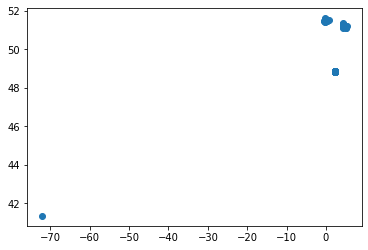

In [61]:
plt.scatter(x=stations['coordinates.longitude'],
            y=stations['coordinates.latitude'])
plt.show()

NO2 데이터와 PM25 데이터 합치기 - concat

In [62]:
air_quality = pd.concat([air_quality_no2, air_quality_pm25],
                        ignore_index=True)
air_quality

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
3173,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³
3174,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³
3175,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³
3176,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³


미세 먼지 데이터와 측정소 데이터 합치기

In [63]:
result = pd.merge(air_quality, stations)
# how='inner' 기본값. on을 설정하지 않으면 같은 이름의 컬럼을 사용해서 merge.
result

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,48.83724,2.39390
1,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,48.83722,2.39390
2,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,48.83724,2.39390
3,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,48.83722,2.39390
4,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,48.83724,2.39390
...,...,...,...,...,...,...,...,...,...
4177,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³,51.49467,-0.13193
4178,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
4179,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
4180,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193


London의 NO2, PM25의 시간에 따른 변화.

In [64]:
result.info()
#> date.utc 컬럼의 데이터 타입 object -> 문자열

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4182 entries, 0 to 4181
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   4182 non-null   object 
 1   country                4182 non-null   object 
 2   date.utc               4182 non-null   object 
 3   location               4182 non-null   object 
 4   parameter              4182 non-null   object 
 5   value                  4182 non-null   float64
 6   unit                   4182 non-null   object 
 7   coordinates.latitude   4182 non-null   float64
 8   coordinates.longitude  4182 non-null   float64
dtypes: float64(3), object(6)
memory usage: 326.7+ KB


In [65]:
# DataFrame에서 date.utc 컬럼의 데이터 타입을 
# 'datetime64' 타입(날짜와 시간을 편리하게 다룰 수 있는 데이터 타입)으로 변환.
result['date.utc'] = result['date.utc'].astype('datetime64')

In [66]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4182 entries, 0 to 4181
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   city                   4182 non-null   object        
 1   country                4182 non-null   object        
 2   date.utc               4182 non-null   datetime64[ns]
 3   location               4182 non-null   object        
 4   parameter              4182 non-null   object        
 5   value                  4182 non-null   float64       
 6   unit                   4182 non-null   object        
 7   coordinates.latitude   4182 non-null   float64       
 8   coordinates.longitude  4182 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 326.7+ KB


In [67]:
# London 데이터만 선택
london = result[result['city'] == 'London']
london

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
2204,London,GB,2019-06-17 11:00:00,London Westminster,no2,11.0,µg/m³,51.49467,-0.13193
2205,London,GB,2019-06-17 10:00:00,London Westminster,no2,11.0,µg/m³,51.49467,-0.13193
2206,London,GB,2019-06-17 09:00:00,London Westminster,no2,11.0,µg/m³,51.49467,-0.13193
2207,London,GB,2019-06-17 08:00:00,London Westminster,no2,13.0,µg/m³,51.49467,-0.13193
2208,London,GB,2019-06-17 07:00:00,London Westminster,no2,13.0,µg/m³,51.49467,-0.13193
...,...,...,...,...,...,...,...,...,...
4177,London,GB,2019-05-07 06:00:00,London Westminster,pm25,9.0,µg/m³,51.49467,-0.13193
4178,London,GB,2019-05-07 04:00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
4179,London,GB,2019-05-07 03:00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
4180,London,GB,2019-05-07 02:00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193


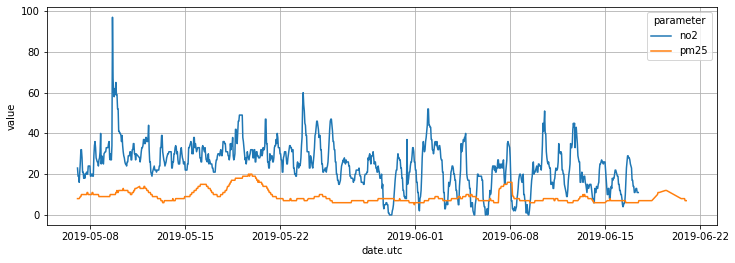

In [71]:
plt.figure(figsize=(12, 4))
sns.lineplot(x='date.utc', y='value', data=london, hue='parameter')
plt.grid()
plt.show()

In [74]:
# London, Paris의 NO2 농도의 시계열 그래프
subset = result[(result['parameter'] == 'no2') & 
                result['city'].isin(['London', 'Paris'])]
subset

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
0,Paris,FR,2019-06-21 00:00:00,FR04014,no2,20.0,µg/m³,48.83724,2.39390
1,Paris,FR,2019-06-21 00:00:00,FR04014,no2,20.0,µg/m³,48.83722,2.39390
2,Paris,FR,2019-06-20 23:00:00,FR04014,no2,21.8,µg/m³,48.83724,2.39390
3,Paris,FR,2019-06-20 23:00:00,FR04014,no2,21.8,µg/m³,48.83722,2.39390
4,Paris,FR,2019-06-20 22:00:00,FR04014,no2,26.5,µg/m³,48.83724,2.39390
...,...,...,...,...,...,...,...,...,...
3168,London,GB,2019-05-07 06:00:00,London Westminster,no2,26.0,µg/m³,51.49467,-0.13193
3169,London,GB,2019-05-07 04:00:00,London Westminster,no2,16.0,µg/m³,51.49467,-0.13193
3170,London,GB,2019-05-07 03:00:00,London Westminster,no2,19.0,µg/m³,51.49467,-0.13193
3171,London,GB,2019-05-07 02:00:00,London Westminster,no2,19.0,µg/m³,51.49467,-0.13193


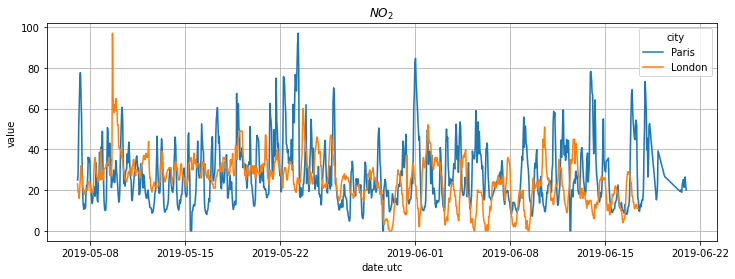

In [76]:
plt.figure(figsize=(12, 4))
sns.lineplot(x='date.utc', y='value', hue='city', data=subset)
plt.grid()
plt.title('$NO_2$')
plt.show()